## Implementation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
## step 01 : Creating Linear data
np.random.seed(42)
n_samples = 100
n_features = 3

X = 2 * np.random.rand(n_samples, n_features)
true_w = np.array([[3.5], [-2.0], [1.0]])
true_b = 1.25
y = X @ true_w + true_b + np.random.randn(n_samples, 1) * 0.5 

In [3]:
# Step 2: Shuffle and split
data = np.hstack((X, y))
np.random.shuffle(data)

n_train = int(0.7 * n_samples)
n_val = int(0.15 * n_samples)
n_test = n_samples - n_train - n_val

train_data = data[:n_train]
val_data = data[n_train:n_train+n_val]
test_data = data[n_train+n_val:]

X_train, y_train = train_data[:, :-1], train_data[:, -1:]
X_val, y_val = val_data[:, :-1], val_data[:, -1:]
X_test, y_test = test_data[:, :-1], test_data[:, -1:]

In [4]:
# Step 3: Initialize
w = np.random.randn(n_features, 1)
b = np.random.randn()
learning_rate = 0.05
lambda_ = 0.1  
n_iterations = 1000
m = X_train.shape[0]

In [5]:
# Step 4: Training Loop (Lasso)
train_loss_history = []
val_loss_history = []

for i in range(n_iterations):
    y_pred = X_train @ w + b

    # Lasso Loss: MSE + L1
    train_loss = (1/m) * np.sum((y_pred - y_train)**2) + lambda_ * np.sum(np.abs(w))
    train_loss_history.append(train_loss)

    # Gradients with L1 regularization
    dw = (2/m) * X_train.T @ (y_pred - y_train) + lambda_ * np.sign(w)
    db = (2/m) * np.sum(y_pred - y_train)

    # Parameter update
    w -= learning_rate * dw
    b -= learning_rate * db

    # Validation loss
    y_val_pred = X_val @ w + b
    val_loss = (1/len(X_val)) * np.sum((y_val_pred - y_val)**2) + lambda_ * np.sum(np.abs(w))
    val_loss_history.append(val_loss)

    if i % 100 == 0:
        print(f"Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

Iteration 0: Train Loss = 37.4022, Val Loss = 8.8663
Iteration 100: Train Loss = 0.9401, Val Loss = 0.8711
Iteration 200: Train Loss = 0.9018, Val Loss = 0.8041
Iteration 300: Train Loss = 0.8938, Val Loss = 0.7865
Iteration 400: Train Loss = 0.8920, Val Loss = 0.7805
Iteration 500: Train Loss = 0.8916, Val Loss = 0.7782
Iteration 600: Train Loss = 0.8915, Val Loss = 0.7772
Iteration 700: Train Loss = 0.8915, Val Loss = 0.7768
Iteration 800: Train Loss = 0.8915, Val Loss = 0.7766
Iteration 900: Train Loss = 0.8915, Val Loss = 0.7765


In [7]:
# Step 5: Final evaluation
from sklearn.metrics import r2_score
y_test_pred = X_test @ w + b
test_loss = (1/len(X_test)) * np.sum((y_test_pred - y_test)**2) + lambda_ * np.sum(np.abs(w))
print(f"\nFinal Test Loss (Lasso): {test_loss:.4f}")
print(f"Test R² Score: {r2_score(y_test, y_test_pred):.4f}")



Final Test Loss (Lasso): 0.9405
Test R² Score: 0.9406


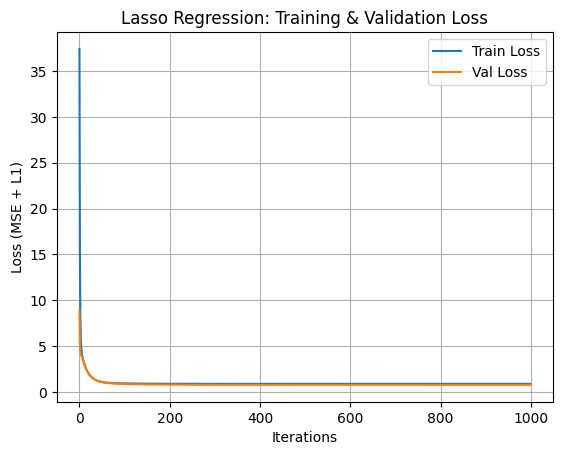

In [8]:
# Step 6: Loss plots
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE + L1)')
plt.title('Lasso Regression: Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

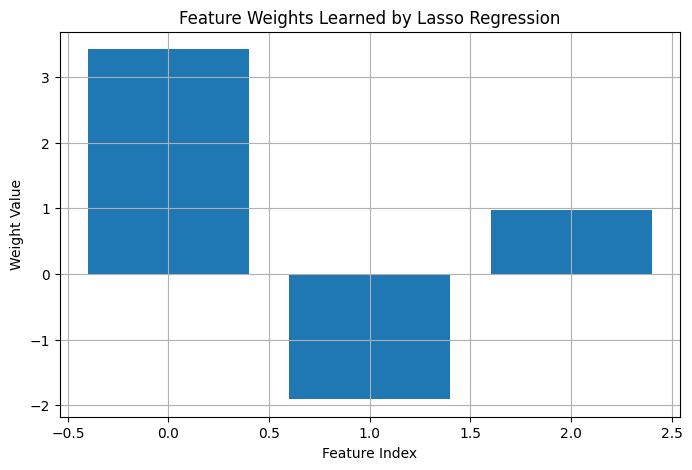

In [10]:
## step 07  : Feature importance visualization
plt.figure(figsize=(8, 5))
plt.bar(range(len(w)), w.flatten())
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.title('Feature Weights Learned by Lasso Regression')
plt.grid(True)
plt.show()
